In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
day = pd.read_csv(r'C:\Users\ebennabh\OneDrive - Visa Inc\Documents\PGP Course Content\day.csv')
day.head()
day = day.drop(['instant','dteday'],axis =1)

Season encoding

In [3]:
season_desc = pd.get_dummies(day['season'])
season_desc1 = season_desc.rename(columns={1:'spring', 2:'summer', 3:'fall', 4:'winter'},inplace = False)


In [4]:
day = pd.concat((day,season_desc1),axis=1)
day = day.drop(['season','spring'],axis=1)
day.head(5)

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,summer,fall,winter
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,False,False,False
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,False,False,False
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,False,False,False
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,False,False,False
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,False,False,False


In [5]:
Month = pd.get_dummies(day['mnth'])
Month1 = Month.rename(columns={ 1:'Jan',2:'Feb',3:'March',4:'April',5:'May', \
                               6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},inplace = False)
Month1.head(5)


,Jan,Feb,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec
0,True,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False


In [6]:
day = pd.concat((day,Month1),axis=1)
# day.head(5)

day = day.drop(['mnth','Jan'],axis=1)

In [7]:
# Weekday encoding

Weekday = pd.get_dummies(day['weekday'])
#Weekday

WEEKDAYS = Weekday.rename(columns={1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thrusday', \
                                   5:'Friday',6:'Saturday',0:'Sunday'},inplace = False)
#WEEKDAYS
day = pd.concat((day,WEEKDAYS),axis=1)
day = day.drop(['weekday','Sunday'],axis=1)


In [8]:
#Weathersit encoding

Weathersit = pd.get_dummies(day['weathersit'])
#Weathersit
Weathersits = Weathersit.rename(columns = {1:'Clear' ,2: 'Mist' , 3: 'Light'},inplace = False)
#Weathersits

day = pd.concat((day,Weathersits), axis =1)
day = day.drop('weathersit',axis=1)
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   casual      730 non-null    int64  
 8   registered  730 non-null    int64  
 9   cnt         730 non-null    int64  
 10  summer      730 non-null    bool   
 11  fall        730 non-null    bool   
 12  winter      730 non-null    bool   
 13  Feb         730 non-null    bool   
 14  March       730 non-null    bool   
 15  April       730 non-null    bool   
 16  May         730 non-null    bool   
 17  June        730 non-null    bool   
 18  July        730 non-null    bool   
 19  Aug         730 non-null    b

VIZ

In [9]:
day.describe().T.style.background_gradient(cmap='coolwarm', axis=1).format(precision=1)

,count,mean,std,min,25%,50%,75%,max
yr,730.0,0.5,0.5,0.0,0.0,0.5,1.0,1.0
holiday,730.0,0.0,0.2,0.0,0.0,0.0,0.0,1.0
workingday,730.0,0.7,0.5,0.0,0.0,1.0,1.0,1.0
temp,730.0,20.3,7.5,2.4,13.8,20.5,26.9,35.3
atemp,730.0,23.7,8.2,4.0,16.9,24.4,30.4,42.0
hum,730.0,62.8,14.2,0.0,52.0,62.6,73.0,97.2
windspeed,730.0,12.8,5.2,1.5,9.0,12.1,15.6,34.0
casual,730.0,849.2,686.5,2.0,316.2,717.0,1096.5,3410.0
registered,730.0,3658.8,1559.8,20.0,2502.2,3664.5,4783.2,6946.0
cnt,730.0,4508.0,1936.0,22.0,3169.8,4548.5,5966.0,8714.0


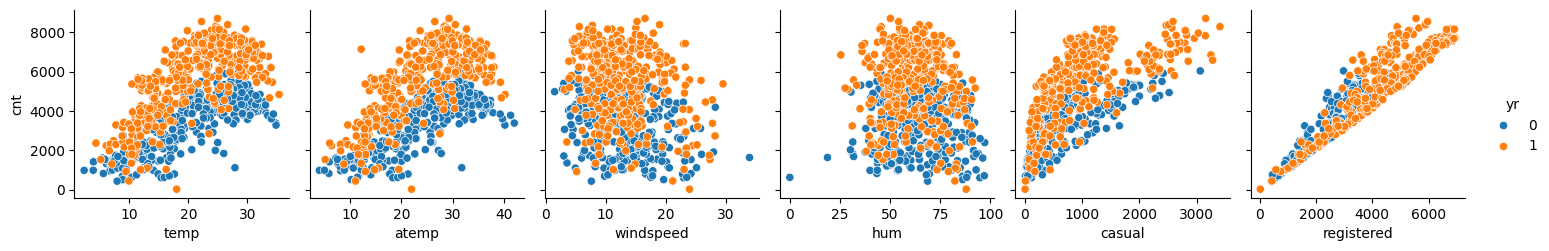

In [10]:
sns.pairplot(day, x_vars=["temp",'atemp', 'windspeed',"hum",'casual','registered'],y_vars=['cnt'],hue ='yr')
plt.show()

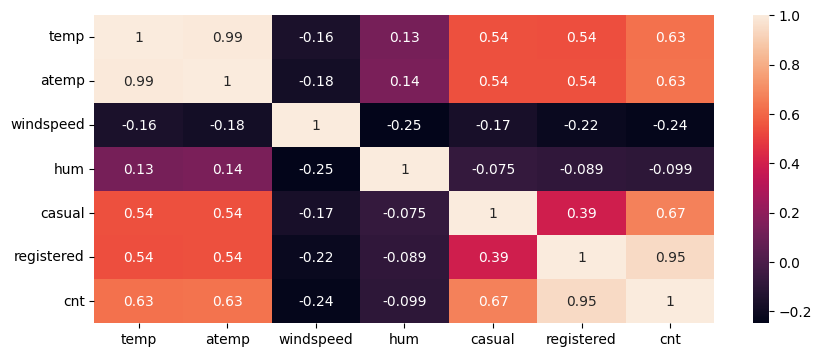

In [11]:

plt.figure(figsize = (10,4))
sns.heatmap(day[["temp",'atemp', 'windspeed',"hum",'casual','registered','cnt']].corr(),annot =True)
plt.show()

Observations 

Temp and atemp have strong corelation

Humidity doesn't have much impact

Registered>Casual

In [12]:
day = day.drop(['atemp','casual','registered'],axis =1)
day.groupby(['Clear', 'Mist','Light','summer','fall','winter'])['cnt'].mean().sort_values(ascending = False)
day

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,...,Dec,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday,Clear,Mist,Light
0,0,0,0,14.110847,80.5833,10.749882,985,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,0,0,14.902598,69.6087,16.652113,801,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,0,0,1,8.050924,43.7273,16.636703,1349,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,0,0,1,8.200000,59.0435,10.739832,1562,False,False,False,...,False,False,True,False,False,False,False,True,False,False
4,0,0,1,9.305237,43.6957,12.522300,1600,False,False,False,...,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,65.2917,23.458911,2114,False,False,False,...,True,False,False,False,True,False,False,False,True,False
726,1,0,1,10.386653,59.0000,10.416557,3095,False,False,False,...,True,False,False,False,False,True,False,False,True,False
727,1,0,0,10.386653,75.2917,8.333661,1341,False,False,False,...,True,False,False,False,False,False,True,False,True,False
728,1,0,0,10.489153,48.3333,23.500518,1796,False,False,False,...,True,False,False,False,False,False,False,True,False,False


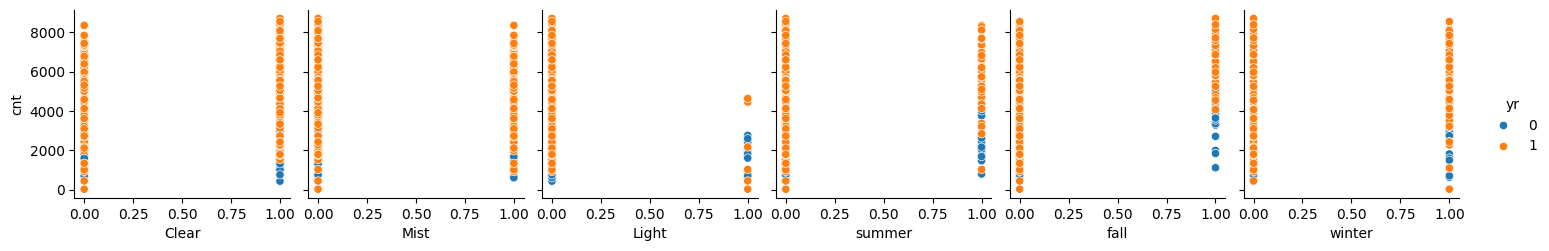

In [13]:

sns.pairplot(day,x_vars =['Clear', 'Mist','Light','summer','fall','winter'],y_vars='cnt',hue ='yr')
plt.show()

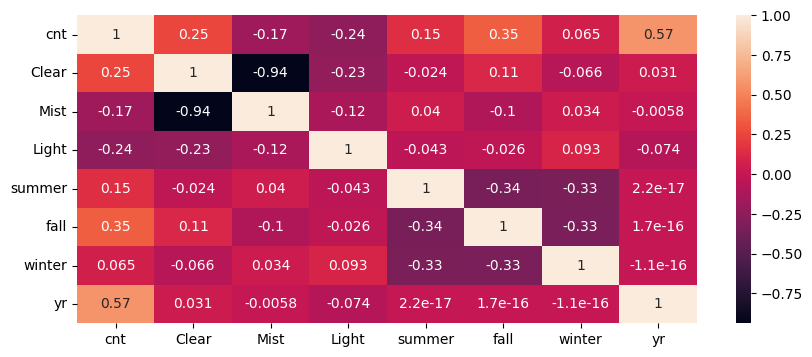

In [14]:

plt.figure(figsize = (10,4))
sns.heatmap(day[['cnt','Clear', 'Mist','Light','summer','fall','winter','yr']].corr(),annot =True)
plt.show()

In [15]:
day.groupby(['summer','fall','winter','Feb','March','April','May','June', 'July' ,'Aug','Sep','Oct','Nov','Dec'])['cnt'].mean().sort_values(ascending = False)

summer  fall   winter  Feb    March  April  May    June   July   Aug    Sep    Oct    Nov    Dec  
False   False  True    False  False  False  False  False  False  False  True   False  False  False    6024.500000
True    False  False   False  False  False  False  True   False  False  False  False  False  False    5773.850000
False   True   False   False  False  False  False  True   False  False  False  False  False  False    5769.400000
                                                   False  False  False  True   False  False  False    5672.704545
                                                                 True   False  False  False  False    5664.419355
                                                          True   False  False  False  False  False    5563.677419
True    False  False   False  False  False  True   False  False  False  False  False  False  False    5349.774194
False   False  True    False  False  False  False  False  False  False  False  True   False  False    5

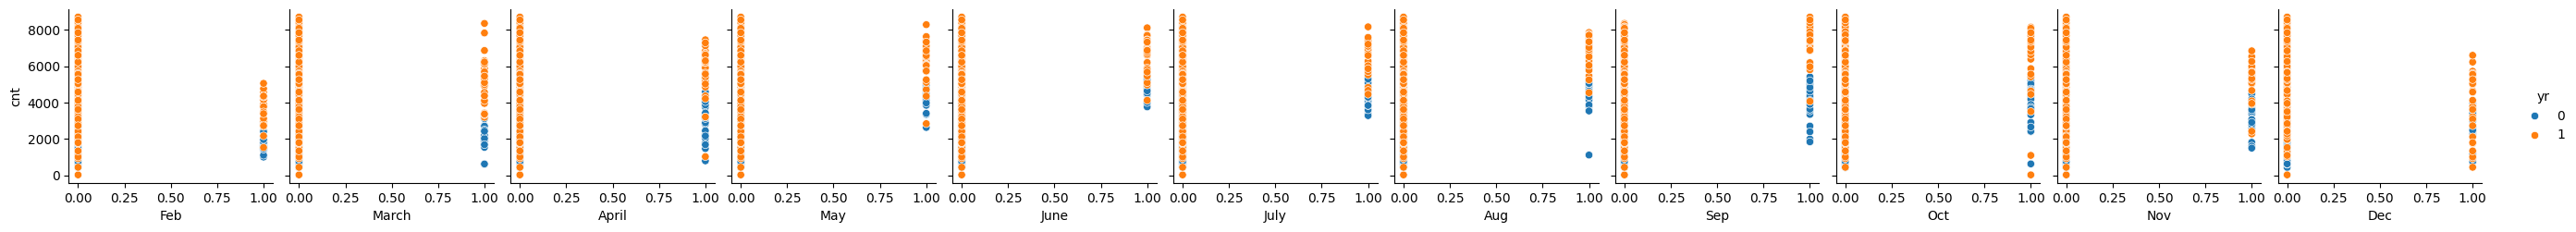

In [16]:
sns.pairplot(day,x_vars =['Feb','March','April','May','June','July' ,'Aug','Sep','Oct','Nov','Dec'],y_vars='cnt',hue ='yr')
plt.show()

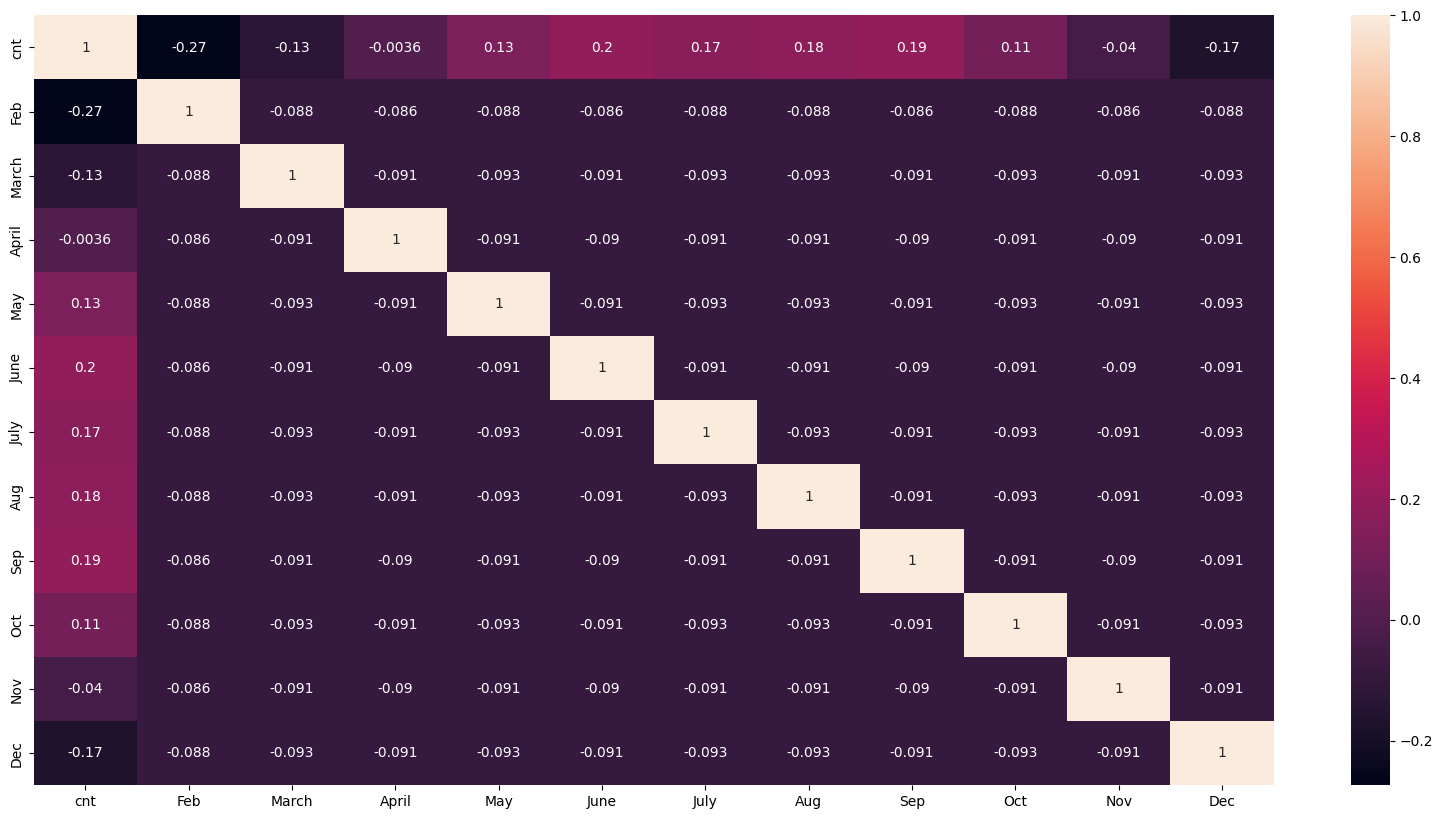

In [17]:
plt.figure(figsize = (20,10))
sns.heatmap(day[['cnt','Feb','March','April','May','June','July' ,'Aug','Sep','Oct','Nov','Dec']].corr(),annot = True)
plt.show()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,...,Dec,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday,Clear,Mist,Light
0,0,0,0,14.110847,80.5833,10.749882,985,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,0,0,14.902598,69.6087,16.652113,801,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,0,0,1,8.050924,43.7273,16.636703,1349,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,0,0,1,8.200000,59.0435,10.739832,1562,False,False,False,...,False,False,True,False,False,False,False,True,False,False
4,0,0,1,9.305237,43.6957,12.522300,1600,False,False,False,...,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,65.2917,23.458911,2114,False,False,False,...,True,False,False,False,True,False,False,False,True,False
726,1,0,1,10.386653,59.0000,10.416557,3095,False,False,False,...,True,False,False,False,False,True,False,False,True,False
727,1,0,0,10.386653,75.2917,8.333661,1341,False,False,False,...,True,False,False,False,False,False,True,False,True,False
728,1,0,0,10.489153,48.3333,23.500518,1796,False,False,False,...,True,False,False,False,False,False,False,True,False,False


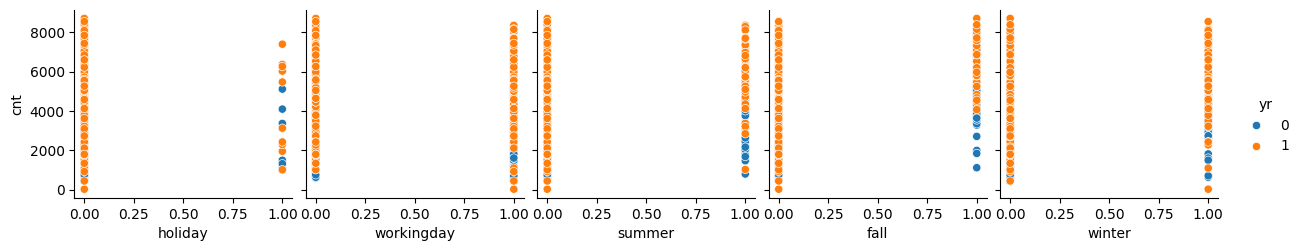

In [18]:
day
day.groupby(['holiday', 'workingday','summer','fall','winter'])['cnt'].mean().sort_values(ascending = False)
display(day)
sns.pairplot(day,x_vars =['holiday', 'workingday','summer','fall','winter'],y_vars='cnt',hue ='yr')
plt.show()

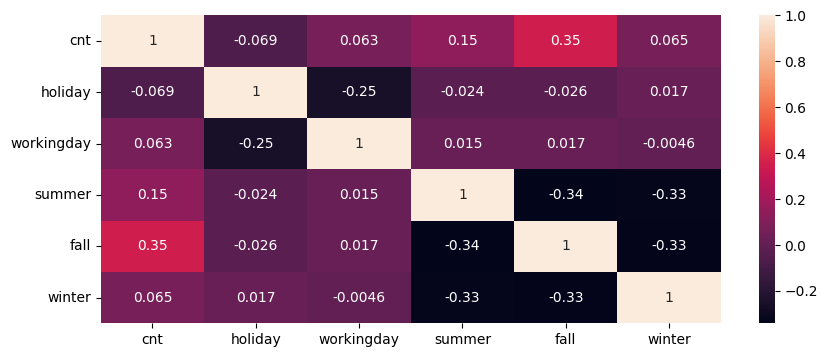

In [19]:
plt.figure(figsize = (10,4))
sns.heatmap(day[['cnt','holiday', 'workingday','summer','fall','winter']].corr(),annot = True)
plt.show()

In [20]:
#Traning-Test Split

df_train,df_test = train_test_split(day,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [21]:


#variable scaling
num_vars = ['temp', 'windspeed',"hum",'cnt']

scaler = MinMaxScaler()

df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,510.0,0.507843,0.500429,0.0,0.000000,1.000000,1.000000,1.0
holiday,510.0,0.025490,0.157763,0.0,0.000000,0.000000,0.000000,1.0
workingday,510.0,0.676471,0.468282,0.0,0.000000,1.000000,1.000000,1.0
temp,510.0,0.537440,0.225858,0.0,0.339853,0.542596,0.735215,1.0
hum,510.0,0.650480,0.145846,0.0,0.538643,0.653714,0.754830,1.0
windspeed,510.0,0.320883,0.169803,0.0,0.199179,0.296763,0.414447,1.0
cnt,510.0,0.513499,0.224421,0.0,0.356420,0.518638,0.684710,1.0


In [22]:
y_train = df_train.pop('cnt')
X_train = df_train
print(X_train.shape)
y_train.sample(5)

(510, 29)


477    0.367234
585    0.835711
563    0.654740
256    0.547975
60     0.242982
Name: cnt, dtype: float64

In [23]:
#feature selection
lm = LinearRegression()
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [24]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'winter',
       'Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday', 'Clear', 'Mist',
       'Light'],
      dtype='object')

In [25]:
X_train.columns[~(rfe.support_)]


Index(['summer', 'fall', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug',
       'Sep', 'Oct', 'Nov', 'Dec', 'Saturday'],
      dtype='object')

In [26]:
#Stats
# X_train_rfe = X_train[col]
# X_train_rfe = sm.add_constant(X_train_rfe)
# lm = sm.OLS(y_train, X_train_rfe).fit()
# lm.summary()

X_train_rfe = X_train[col].astype(float)
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe = np.asarray(X_train_rfe)
y_train = np.asarray(y_train)
lm = sm.OLS(y_train, X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     157.9
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          9.06e-167
Time:                        23:52:42   Log-Likelihood:                 456.23
No. Observations:                 510   AIC:                            -884.5
Df Residuals:                     496   BIC:                            -825.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0809      0.027      2.964      0.003       0.027       0.134
x1             0.2289      0.009     25.364      0.000       0.211       0.247
x2            -0.0700      0.026     -2.745      0.006      -0.120      -0.020
x3             0.0271      0.009      3.159      0.002       0.010       0.044
x4             0.6045      0.022     27.732      0.000       0.562       0.647
x5            -0.1413      0.041     -3.407      0.001      -0.223      -0.060
x6            -0.1694      0.028     -5.993      0.000      -0.225      -0.114
x7             0.1124      0.011     10.205      0.000       0.091       0.134
x8            -0.0171      0.011     -1.592      0.112      -0.038       0.004
x9            -0.0158      0.012     -1.286      0.199      -0.040       0.008
x10           -0.0006      0.012     -0.056      0.955      -0.023       0.022
x11           -0.0078      0.012     -0.649      0.516      -0.031       0.016
x12           -0.0016      0.012     -0.126      0.900      -0.026       0.023
x13            0.1231      0.009     13.274      0.000       0.105       0.141
x14            0.0751      0.013      5.960      0.000       0.050       0.100
x15           -0.1173      0.024     -4.812      0.000      -0.165      -0.069
==============================================================================
Omnibus:                       38.949   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.363
Skew:                          -0.435   Prob(JB):                     7.91e-19
Kurtosis:                       4.780   Cond. No.                     1.53e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.19e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [29]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif 

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
X_train_rfe = X_train_rfe.drop('Clear',axis=1)
X_train_rfe.columns


X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()


In [ ]:
X_train_rfe.shape

In [ ]:
y_train_pred = lr_model.predict(X_train_sm)
res = (y_train - y_train_pred)

In [ ]:
plt.figure(figsize = (10,4))
sns.set_style("darkgrid")
sns.distplot(res)
plt.show()

In [ ]:
plt.figure(figsize = (10,4))
sns.set_style("darkgrid")
plt.scatter(y_train_pred,res)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()

In [ ]:
plt.figure(figsize = (10,4))
sns.set_style("darkgrid")
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Vs. Points')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
num_vars = ['temp', 'windspeed',"hum",'cnt']

df_test[num_vars]=scaler.transform(df_test[num_vars])

y_test = df_test.pop('cnt')
X_test = df_test
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

In [ ]:
X_test_sm = X_test_sm.drop(['fall', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Nov', 'Dec', \
       'Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday','Clear'],axis=1)

y_test_pred = lr_model.predict(X_test_sm)

y_test_pred.sample(5)

In [ ]:
#Ytest vs Ypred
plt.figure(figsize = (10,4))
sns.set_style("darkgrid")
sns.regplot(x=y_test, y=y_test_pred)
plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.show()

In [ ]:
#r2 score - model accuracy

r2_score(y_test,y_test_pred)



In [ ]:
Cofficients = round(lr_model.params,2)
beta = Cofficients.sort_values(ascending = False)
beta



In [ ]:
for i in range(0, len(beta)):
    print(beta[i],'*',beta.index[i],end ='')
    print(' + ',end ='')

Final Observations

1) Weather affects the rides (temperature)

2) As expected, rainy days/season affect the biz negatively



